# **Monitoring ML Systems and Observations**

Even though we've trained and thoroughly evaluated our model, the real work begins once we deploy to production.
**"Training and deploying ML models is relatively fast and cheap, but maintaining, monitoring and governing them over time is difficult and expensive.”**

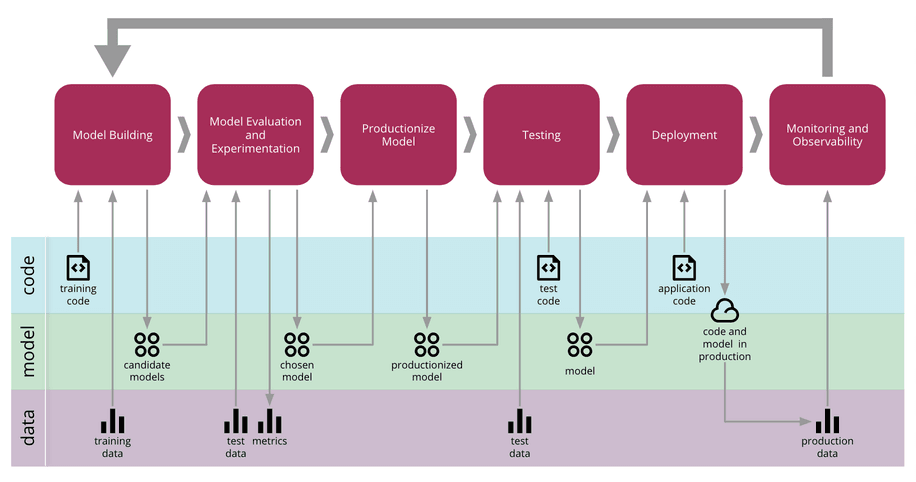

This diagram outlines six distinct phases in the lifecycle of an ML model:

- Model Building: Understanding the problem, data preparation, feature engineering and initial code. Typical artifacts are rough Jupyter notebooks.

- Model Evaluation and Experimentation: Feature selection, hyperparameter tuning, and comparing the effectiveness of different algorithms on the given problem. Typical artifacts include notebooks with stats and graphs evaluating feature weights, accuracy, precision, and Receiver Operating Characteristics (ROC).

- Productionize Model: Taking “research” code and preparing it so it can be deployed. Typical artifacts are production-grade code, which in some cases will be in a completely different programming language and/or framework.

- Testing: Ensuring that production code behaves in the way we expect it to, and that its results match those we saw during the Model Evaluation and Experimentation phase. Typical artifacts are test cases.

- Deployment: Getting the model into production where it can start adding value by serving predictions. Typical artifacts are APIs for accessing the model.

- Monitoring and Observability: The final phase, where we ensure our model is doing what we expect it to in production.

In the diagram, notice the arraw, where information collected in the final “Monitoring & Observability” phase feeds back to the “Model Building”.

For most companies, this is a non-automated process of evaluating the impact of a model from a business perspective and then considering whether the existing model needs updating, abandoning might benefit from a complementary model. In more advanced companies, it could mean the data collected during the monitoring phase directly feeding into training data for model updates in an automated fashion

## Different testing in ML

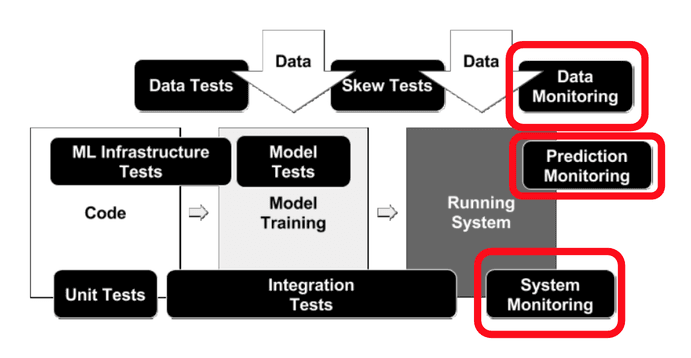




### **System health/Performance metrics**

Some examples of system performance monitoring metrics that can be also added through further integrations include:

- Requests per second
- Latency per request
- CPU/memory/data utilisation
- Custom application metrics

These will depend mainly on the infrastructure that you choose and what metrics are needed to be tracked


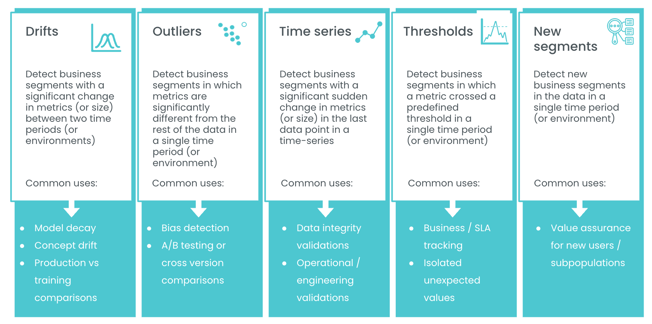


<br>


# **Drift**

Drift is the change in an entity with respect to a baseline. Machine learning models are trained with historical data, but once they are used in the real world, they may become outdated and lose their accuracy over time due to a phenomenon called drift.

Drift is the change over time in the statistical properties of the data that was used to train a machine learning model. This can cause the model to become less accurate or perform differently than it was designed to.

**It refers to quantifying the changes in the observed data with respect to the training data.**

## Why does it drift

There are several reasons why machine learning models can drift over time.

1. **Outdated data:** One common reason is simply that the data that the model was trained on becomes outdated or no longer represents the current conditions.

For example, consider a machine learning model trained to predict the stock price of a company based on historical data. If we train the model with data from a stable market, it might do well at first. However, if the market becomes more volatile over time, the model might not be able to accurately predict the stock price anymore because the statistical properties of the data have changed.

2. **Inefficient Model:** Another reason for model drift is that the model was not designed to handle changes in the data. Some machine learning models can handle changes in the data better than others, but no model can avoid drift completely.

## Types of drift

Two major drifts that often occur after a model has been deployed are concept drift and data drift.

### **Concept drift**

**Concept drift, also known as model drift, occurs when the task that the model was designed to perform changes over time.**

It refers to a change in relationships between input data, ‘x’ and output data ‘y’ over a period of time.

**Eg- -**
- Consider a housing price prediction model. In an anomalous situation such as the pandemic, there is a sudden change in real estate prices and hence, the model may not make accurate predictions anymore. A home that costs 50 lakh INR in a normal scenario might now cost 75 lakh INR for the same set and quantity of features like bedrooms, ACs, area in square feet, etc.



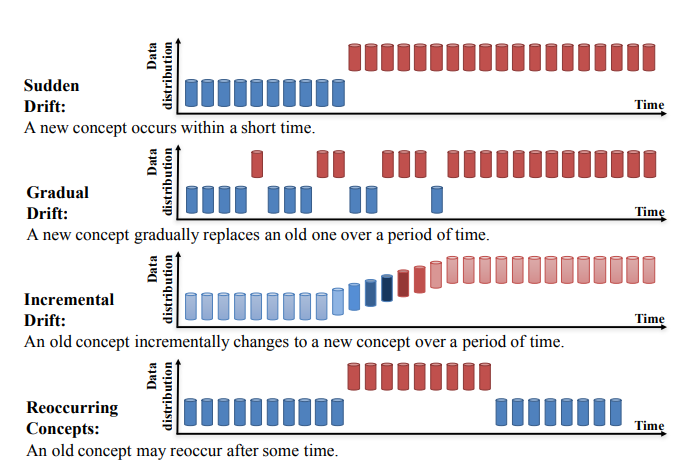



## **Data drift**

**Data drift refers to a change in the input features. Mathematically, it is a change in the distribution of variables that causes their meaning to change.**

 The change in input data or independent variable leads to poor performance of the model. Microsoft has stated data drift to be one of the top reasons model accuracy degrades over time.

Data drift is generally a consequence of changes in consumer preferences over time.

For instance,
- educational data collected before Covid shows a lesser preference for online learning than post-covid.
- Similarly, the demand for lipsticks has reduced considerably after Covid while face masks became a norm. As a result,

Models trained on previous data will be useless. Since the input data has changed, the distribution of the variables becomes different and confuses the model.

Data drift, feature drift, population, or covariate shift. Quite a few names to describe essentially the same thing.

**Reasons for data drift**

- changes in the data collection process
- changes in the data sources which provide the inputs
- changes in the business needs.
- Change in the distribution of the label/features in the data

---

## Methods Available to detect Data Drift:
There are several methods available for detecting feature drift in machine learning:

- **Visual inspection**: One simple method is to visually inspect the input data over time to see if there are any noticeable changes in the distribution of the features. This can be done by plotting histograms or scatter plots of the data at different times and comparing them.
- **Statistical tests**: Statistical tests such as the Chi-Squared Test  can be used to compare the input data distribution at different times and detect significant differences. These tests can provide a quantitative measure of the degree of drift in the data.
- **Model performance monitoring**: Another approach is to monitor the performance of the model over time and look for significant changes in accuracy or other performance metrics. If the model’s performance begins to degrade, this could indicate that there is a drift in the data.
- **Data quality checks**: Regularly checking the quality of the input data can also help detect feature drift. For example, if there are sudden changes in the range, mean, median or variance of the features, this could indicate that there is a drift in the data.

<br>

# **Monitoring setup for Bicycle Sharing Demand Prediction**


* calculate prerformance and data drift for the model
* using mstatistical methods like ks test, chi square test and evidently
* log models quality & data drift using MLflow Tracking
* explore the result


In [23]:
import datetime
import pandas as pd
import numpy as np
import requests
import zipfile
import io
import json

from sklearn import datasets, ensemble, model_selection
from scipy.stats import anderson_ksamp


### **Bicycle Demand Data**

More information about the dataset can be found in UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

Acknowledgement: Fanaee-T, Hadi, and Gama, Joao, 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg

In [24]:
content = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip").content
with zipfile.ZipFile(io.BytesIO(content)) as arc:
    raw_data = pd.read_csv(arc.open("hour.csv"), header=0, sep=',', parse_dates=['dteday'])

In [25]:
raw_data.index = raw_data.apply(lambda row: datetime.datetime.combine(row.dteday.date(), datetime.time(row.hr)),
                                axis=1)

In [26]:
raw_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [27]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64  

## **Kolmogorov–Smirnov (KS) test**


### **Why the KS test is used for drift detection ?**


---

**1. Conceptual intuition — why KS fits drift detection**

**Drift detection** asks:
- **Has the distribution of a feature changed between the baseline (training) data and new production data?**
- The KS test answers a very similar statistical question:
  - **Are these two samples drawn from the same continuous distribution?**

**Why that matters:**

* If the **input feature distributions** shift, model behaviour can change (predictions, probabilities, errors).
* KS directly compares **empirical cumulative distribution functions (ECDFs)** of two samples and reports:

  * **D** = maximum absolute difference between ECDFs (effect size),
  * **p-value** = how likely such a D is under the null that the distributions are identical.

Because KS is nonparametric (no assumption of normality) and sensitive to any change in shape/location/tails, it is a natural, model-agnostic test to detect distributional drift for **univariate continuous features**.

---

#### **2. What KS detects**

**KS is sensitive to:**

* Shifts in central tendency (mean/median),
* Changes in spread (variance),
* Shape differences (skew, multimodality),
* Differences in tails.

KS is **not** sensitive to :

* Designed for multivariate data (only univariate).
* Very powerful for discrete variables with many ties (ties reduce accuracy of asymptotic p-values).
* A detector of *where* the shift happens — it only gives a magnitude (D) and significance (p).

---

### 3. Strengths that make KS popular in monitoring

* **Nonparametric**: no distributional assumptions — works for many real-world features.
* **Simple effect size**: D is interpretable (maximum ECDF gap).
* **Fast** and available in scientific libraries (e.g., SciPy `ks_2samp`).
* **Model-agnostic**: can be applied to raw features, model scores, or prediction probabilities.

These properties make KS an easy first-line check in many monitoring pipelines.

---





## **The Kolmogorov-Smirnov Test (KS Test)**
The KS test is a test of the equality between two univariate probability distributions. It can be used to compare a sample with a reference probability distribution or compare two samples.

When comparing two samples, we are trying to answer the following question:

“What is the probability that these two sets of samples were drawn from the same probability distribution?”

***The null hypothesis is that the two samples come from the same distribution. The KS-test is applied to reject or accept it.***

It returns the p-value. If the p-value is less than 0.05, you can usually declare that there is strong evidence to reject the null hypothesis and consider the two samples different.

You can also set a different significance level and, for example, react only to p-values less than 0.01. It is good to remember that the p-value is not a "measurement" of drift size but a declaration of the statistical test significance.



The **Kolmogorov-Smirnov (KS) two-sample test** is used to check if two numerical samples belong to the same distribution.

*   **Null Hypothesis (H0):** The two samples (Reference and Current) come from the **same distribution**.
*   **Decision Rule:** If the **p-value is less than 0.05**, we **reject** H0, indicating distribution mismatch (Data Drift).

In [28]:

from scipy import stats
import random


#Significance level

p_value = 0.05 # 0.05 means a 5% risk of wrongly detecting drift (false positive).
rejected = 0   #

numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'hr', 'weekday']
categorical_features = ['season', 'holiday', 'workingday']


reference = raw_data.loc['2011-01-01 00:00:00':'2011-01-28 23:00:00']
current = raw_data.loc['2011-01-29 00:00:00':'2011-02-28 23:00:00']

for col in numerical_features:
    test = stats.ks_2samp(reference[col], current[col])

    print(col, test)
    if test[1] < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(numerical_features)))


temp KstestResult(statistic=np.float64(0.3268630919426928), pvalue=np.float64(6.026276035162504e-32), statistic_location=np.float64(0.22), statistic_sign=np.int8(1))
Column rejected temp
atemp KstestResult(statistic=np.float64(0.3233995435947986), pvalue=np.float64(2.855460838157155e-31), statistic_location=np.float64(0.2273), statistic_sign=np.int8(1))
Column rejected atemp
hum KstestResult(statistic=np.float64(0.10336407541938417), pvalue=np.float64(0.0014918623865842317), statistic_location=np.float64(0.35), statistic_sign=np.int8(-1))
Column rejected hum
windspeed KstestResult(statistic=np.float64(0.07590999725436713), pvalue=np.float64(0.04055120974818981), statistic_location=np.float64(0.3284), statistic_sign=np.int8(1))
Column rejected windspeed
mnth KstestResult(statistic=np.float64(0.9026425591098748), pvalue=np.float64(1.472945287377825e-288), statistic_location=np.int64(1), statistic_sign=np.int8(1))
Column rejected mnth
hr KstestResult(statistic=np.float64(0.011077053260776


### 🧩 **Step-by-step breakdown -**

#### 1️⃣ Import libraries

```python
from scipy import stats
import random
```

* `stats` from SciPy provides the `ks_2samp()` function for the KS test.

---

#### 2️⃣ Define significance level and counter

```python
p_value = 0.05
rejected = 0
```

* **Significance level (α)** = 0.05 means a 5% risk of wrongly detecting drift (false positive).
* `rejected` will count how many features **failed the KS test** (i.e., drift detected).

---

#### 3️⃣ Define feature lists

```python
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'hr', 'weekday']
categorical_features = ['season', 'holiday', 'workingday']
```

* Separate features by type.
* Only **numerical features** are tested here — because KS test is for continuous/univariate data.

---

#### 4️⃣ Split data into baseline and current windows

```python
reference = raw_data.loc['2011-01-01 00:00:00':'2011-01-28 23:00:00']
current = raw_data.loc['2011-01-29 00:00:00':'2011-02-28 23:00:00']
```

* These lines create two subsets of data based on **timestamps**.
* `reference`: acts as your **training/baseline** distribution.
* `current`: acts as your **new/production** data.
* The idea is to compare each feature’s distribution between these two windows.

---

#### 5️⃣ Perform KS test for each numerical column

```python
for col in numerical_features:
    test = stats.ks_2samp(reference[col], current[col])
```

* For each feature, run a **two-sample KS test**.
* Output (`test`) is a tuple:

  * `test.statistic` → KS statistic (the maximum distance between ECDFs).
  * `test.pvalue` → probability that both samples come from the same distribution.

---

#### 6️⃣ Interpret the test result

```python
if test[1] < p_value:
    rejected += 1
    print("Column rejected", col)
```

* If the **p-value < 0.05**, reject the null hypothesis (meaning: the two samples **don’t come from the same distribution**).
* Increment `rejected` to count the drifted features.

---

#### 7️⃣ Summary output

```python
print("We rejected ",rejected," columns in total out of {} columns".format(len(numerical_features)))
```

* Shows **how many features** out of all numerical ones were detected as **drifted**.

---


---

### ✅ **In short**

This code:

* Splits the dataset into two time ranges (baseline vs current),
* Runs **KS-test** on all numeric columns,
* Flags columns where **distribution drift** is statistically significant (p < 0.05),
* Reports the number of such drifted features.

---
---

### **Output -**

For **each feature**, it tested whether the two time periods come from the **same probability distribution**.

---

🧾 **Output Breakdown**

| Feature       | KS Statistic | p-value   | Result     | Interpretation                                                               |
| ------------- | ------------ | --------- | ---------- | ---------------------------------------------------------------------------- |
| **temp**      | 0.3268       | 6.02e-32  | ❌ Rejected | Strong drift — temperature distribution changed drastically.                 |
| **atemp**     | 0.3234       | 2.85e-31  | ❌ Rejected | Similar drift — feels-like temperature shifted significantly.                |
| **hum**       | 0.1033       | 0.00149   | ❌ Rejected | Humidity levels changed between periods.                                     |
| **windspeed** | 0.0759       | 0.0405    | ❌ Rejected | Slight drift — small but statistically significant difference in wind speed. |
| **mnth**      | 0.9026       | 1.47e-288 | ❌ Rejected | Huge drift — because January and February are *different months* entirely.   |
| **hr**        | 0.0110       | 0.9999    | ✅ Accepted | No drift — hour distributions are almost identical between both windows.     |
| **weekday**   | 0.0228       | 0.9929    | ✅ Accepted | No drift — weekdays are evenly distributed in both samples.                  |

---

### 📊 **Interpretation -**

✅ **Null hypothesis (H₀)** — both distributions are the same.

❌ **Rejection of H₀** — distributions are *different* → indicates drift.

### So:

* Out of 7 columns → **5 are drifted**, 2 are stable.
* The **p-value < 0.05** threshold determined the drifted columns.

---

**KS Statistic Meaning**

* The `statistic` = max distance between two cumulative distributions (ECDFs).
* Higher value → bigger drift.

  * `mnth = 0.90` → extreme drift (totally different months)
  * `temp ≈ 0.32` → strong drift
  * `hr ≈ 0.01` → almost identical distributions

---



<br>

---

<br>


## **Chi-square**
- Chi-square test in another popular divergence test well-suited for categorical data.

- The chi square statistic is a statistical hypothesis testing technique to test how two distributions of categorical variables are related to each other. Specifically, the chi-square statistic is a single number that quantifies the difference between the observed counts versus the counts that are expected if there was no relationship between the variables at all.

 - The divergence can range from zero to infinity. A value of zero means there is no difference between the data sets.

The null and alternative hypotheses of the Chi-Square Test of Fit Test are:

**Null Hypothesis:**

**The null hypothesis is: two groups have no significant difference.**



In [29]:
from scipy.stats import chi2_contingency

def drift_chisquare(sample1, sample2):
    return chi2_contingency([sample1, sample2])[1]

In [30]:
for col in categorical_features:
    print(col, set(reference[col].values))

season {np.int64(1)}
holiday {np.int64(0), np.int64(1)}
workingday {np.int64(0), np.int64(1)}


In [31]:
for col in categorical_features:
    val = drift_chisquare(reference[col].value_counts(),current[col].value_counts() )

    print(col,val)
    rejected = 0
    if val < p_value:
        rejected += 1
        print("Column rejected", col)

print("We rejected ",rejected," columns in total out of {} columns".format(len(categorical_features)))

season 1.0
holiday 0.6986573626612528
workingday 0.5917879941201512
We rejected  0  columns in total out of 3 columns




**Code Explanation**

```python
from scipy.stats import chi2_contingency

def drift_chisquare(sample1, sample2):
    return chi2_contingency([sample1, sample2])[1]
```

👉 What this does:

* `chi2_contingency()` returns several values including the **p-value**.
* Here you only take `[1]`, which is the **p-value**.
* You are comparing **two categorical distributions**:
  `sample1` = counts in reference data
  `sample2` = counts in current data

---

```python
for col in categorical_features:
    print(col, set(reference[col].values))
```

👉 Just printing the unique categories present in each feature (for understanding).

---

```python
for col in categorical_features:
    val = drift_chisquare(reference[col].value_counts(), current[col].value_counts())
    print(col, val)
```

👉 For each categorical column:

* `reference[col].value_counts()` → gives frequency of each category in the reference data.
* `current[col].value_counts()` → gives frequency of each category in current data.
* `drift_chisquare()` → computes the p-value comparing these two distributions.

---

```python
    rejected = 0
    if val < p_value:
        rejected += 1
        print("Column rejected", col)
```

👉 If `p_value < 0.05`, it means drift detected → reject null hypothesis → that column has **significant drift**.

---

```python
print("We rejected ",rejected," columns in total out of {} columns".format(len(categorical_features)))
```

👉 Finally prints how many categorical columns show drift.

---
Perfect 👌— let’s interpret your **Chi-Square drift detection output** carefully:

---

### 🧾 **Output -**

```
season 1.0
holiday 0.6986573626612528
workingday 0.5917879941201512
We rejected 0 columns in total out of 3 columns
```

---


### 🔹 Step 1— Check the p-values

| Column       | p-value | Interpretation                                |
| ------------ | ------- | --------------------------------------------- |
| `season`     | 1.0     | No drift (distributions are nearly identical) |
| `holiday`    | 0.6986  | No drift (very high p-value)                  |
| `workingday` | 0.5918  | No drift (very high p-value)                  |

---

### 🔹 Step 2— Compare with significance level (α = 0.05)

* ✅ If **p ≥ 0.05** → fail to reject null → **no drift**
* ❌ If **p < 0.05** → reject null → **drift detected**

Here, all p-values are **much higher than 0.05** →
✅ So, **no categorical feature has drifted.**



<br>

---

<br>

## **Model Training**

**Defining Target and Feature Columns**

In [32]:
target = 'cnt'
prediction = 'prediction'
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'hr', 'weekday']
categorical_features = ['season', 'holiday', 'workingday', ]#'weathersit']

**Creating Reference and Current Datasets**

In [33]:
reference = raw_data.loc['2011-01-01 00:00:00':'2011-01-28 23:00:00']
current = raw_data.loc['2011-01-29 00:00:00':'2011-02-28 23:00:00']

**Splitting Reference Data into Train/Test Sets**

In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    reference[numerical_features + categorical_features],
    reference[target],
    test_size=0.3
)

**Creating and Training the Random Forest Regressor**

In [35]:
regressor = ensemble.RandomForestRegressor(random_state = 0)

In [36]:
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

**Making Predictions**

In [37]:
preds_test = regressor.predict(X_test)

## **Model validation**

Importing **three performance metrics** from `sklearn.metrics`, which are used to evaluate **regression models**:

* **MAE** → Mean Absolute Error
* **MSE** → Mean Squared Error
* **R²** → Coefficient of Determination

These metrics compare your **predicted values (`preds_test`)** with the **actual true values (`y_test`)**.


In [38]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [39]:
ref_mae=mean_absolute_error(y_test,preds_test)
ref_mse=mean_squared_error(y_test,preds_test)
ref_r2 = r2_score(y_test,preds_test)


print("MAE",ref_mae)
print("MSE",ref_mse)
print("R2",ref_r2)

MAE 12.936236559139784
MSE 337.4938752688172
R2 0.8558581395991937


---

**Explanation -**


**Metric Calculations**

**(a) Mean Absolute Error (MAE)**

```python
ref_mae = mean_absolute_error(y_test, preds_test)
```


* **Meaning:**
  It measures the **average absolute difference** between predicted and actual values.
  It tells us **how far off**, on average, our predictions are — **in the same units as the target** (`cnt`).

* **Interpretation:**
  MAE = **12.93** → on average, your model’s prediction is **off by about 13 bike rentals**.

---

**(b) Mean Squared Error (MSE)**

```python
ref_mse = mean_squared_error(y_test, preds_test)
```


* **Meaning:**
  It measures the **average squared difference** between predictions and actuals.

  Squaring makes large errors more penalized — so it’s **sensitive to outliers**.

* **Interpretation:**
  MSE = **337.49** → on average, the squared error (in bike counts²) is 337.
  
  You can also take √MSE to get **Root Mean Squared Error (RMSE)**:

  → meaning the model’s predictions deviate roughly **±18 bikes** from actual counts.

---

**(c) R² Score (Coefficient of Determination)**

```python
ref_r2 = r2_score(y_test, preds_test)
```


* **Meaning:**
  R² measures how well the model explains the **variance** in the target variable.
  It ranges between:

  * **1.0 → perfect prediction**
  * **0.0 → no better than predicting the mean**
  * **< 0.0 → worse than a constant mean model**

* **Interpretation:**
  R² = **0.8559** → means your Random Forest model explains **85.6% of the variance** in the bike count data, which is quite good.

---

##@# 📊 **3️⃣ Your Output (Explained)**


| Metric                                | Meaning                                                 | Result             | Interpretation                                                        |
| ------------------------------------- | ------------------------------------------------------- | ------------------ | --------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**         | Average prediction error in actual units                | 12.93              | On average, your model is off by **~13 bikes** — very accurate.       |
| **MSE (Mean Squared Error)**          | Penalizes larger errors                                 | 337.49             | The squared difference is quite low — consistent prediction accuracy. |
| **R² (Coefficient of Determination)** | Explains how much variance in `cnt` your model captures | **0.8558 (≈ 86%)** | Excellent model — explains most of the variability in demand.         |

✅ **Conclusion:**
The model is well-trained and performing strongly on the **January dataset** (the same distribution it was trained on).


---



<br>


<br>



### **To evaluate the trained model on new (current) data -**

**Getting result on second set-**

In [40]:
current_x=current[numerical_features + categorical_features]
current_y=current[target]

current_pred = regressor.predict(current_x)

---

In [41]:
print("MAE",mean_absolute_error(current_y,current_pred))
print("MSE",mean_squared_error(current_y,current_pred))

r2 = r2_score(current_y,current_pred)
print(r2)

MAE 20.399860917941584
MSE 1071.3465891515996
0.7228692543053573


**Explanation**

**`1. current_x = current[numerical_features + categorical_features]`**

✅ **What it does:**
This line selects all the *independent variables (features)* from the **current dataset**.

You already defined:

```python
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'hr', 'weekday']
categorical_features = ['season', 'holiday', 'workingday']
```

So, this line combines both lists and selects those columns:

```python
['temp', 'atemp', 'hum', 'windspeed', 'mnth', 'hr', 'weekday', 'season', 'holiday', 'workingday']
```

👉 `current_x` = all input features from February data (used to make predictions)

---

🎯 **`2. current_y = current[target]`**

✅ **What it does:**
Selects the *target/output variable* (actual values) from the current dataset.

You already defined:

```python
target = 'cnt'
```

So, `current_y` = actual bike rental counts (`cnt`) from February data.
This is the **ground truth** you’ll compare predictions against.

---

**3. `current_pred = regressor.predict(current_x)`**

✅ **What it does:**
Uses the **trained Random Forest model** (`regressor`) to predict the bike rental count for the current (February) dataset.

📦 The model was trained earlier on **January data**, so now we’re testing how it performs on new unseen data.

🧠 This gives:

```
current_pred = [pred_1, pred_2, pred_3, ..., pred_n]
```

— a list of predicted counts.

---

### 🧾 **7. Output Explanation**

```
MAE 20.399860917941584
MSE 1071.3465891515996
0.7228692543053573
```

| Metric            | Meaning                  | Interpretation                                     |
| ----------------- | ------------------------ | -------------------------------------------------- |
| **MAE = 20.39**   | Average error ≈ 20 bikes | Model’s average prediction misses by 20            |
| **MSE = 1071.34** | Large squared error      | High penalty on big mistakes                       |
| **R² = 0.72**     | 72% variance explained   | Model performance dropped compared to earlier 0.86 |




---




---

## 📊 **3️⃣ Combined Summary Table**

| Metric  | January (Reference) | February (Current) | Change     | Interpretation                                     |
| ------- | ------------------- | ------------------ | ---------- | -------------------------------------------------- |
| **MAE** | 12.93               | 20.39              | ⬆️ +7.46   | Model less accurate, more deviation per prediction |
| **MSE** | 337.49              | 1071.34            | ⬆️ +733.85 | Errors grew sharply, especially large ones         |
| **R²**  | 0.8558              | 0.7228             | ⬇️ -0.133  | Model explains 13% less variance                   |


---



<br>


<br>


## **Adding data to ml flow**

In [42]:
!pip install mlflow

In [43]:
import mlflow
#import mlflow.sklearn
from mlflow.tracking import MlflowClient
import os

In [44]:
mlflow.set_experiment("Bicycle–Sharing")

2025/11/07 10:32:40 INFO mlflow.tracking.fluent: Experiment with name 'Bicycle–Sharing' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///content/mlruns/121107545285937136', creation_time=1762511560493, experiment_id='121107545285937136', last_update_time=1762511560493, lifecycle_stage='active', name='Bicycle–Sharing', tags={}>

In [45]:
with mlflow.start_run():

    mlflow.set_tag('mlflow.runName','Refrence_run')
    mlflow.log_metric("MAE",ref_mae)
    mlflow.log_metric("MSE",ref_mse)
    mlflow.log_metric("R2",ref_r2)

    mlflow.sklearn.log_model(regressor, "model")


2025/11/07 10:32:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/07 10:32:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


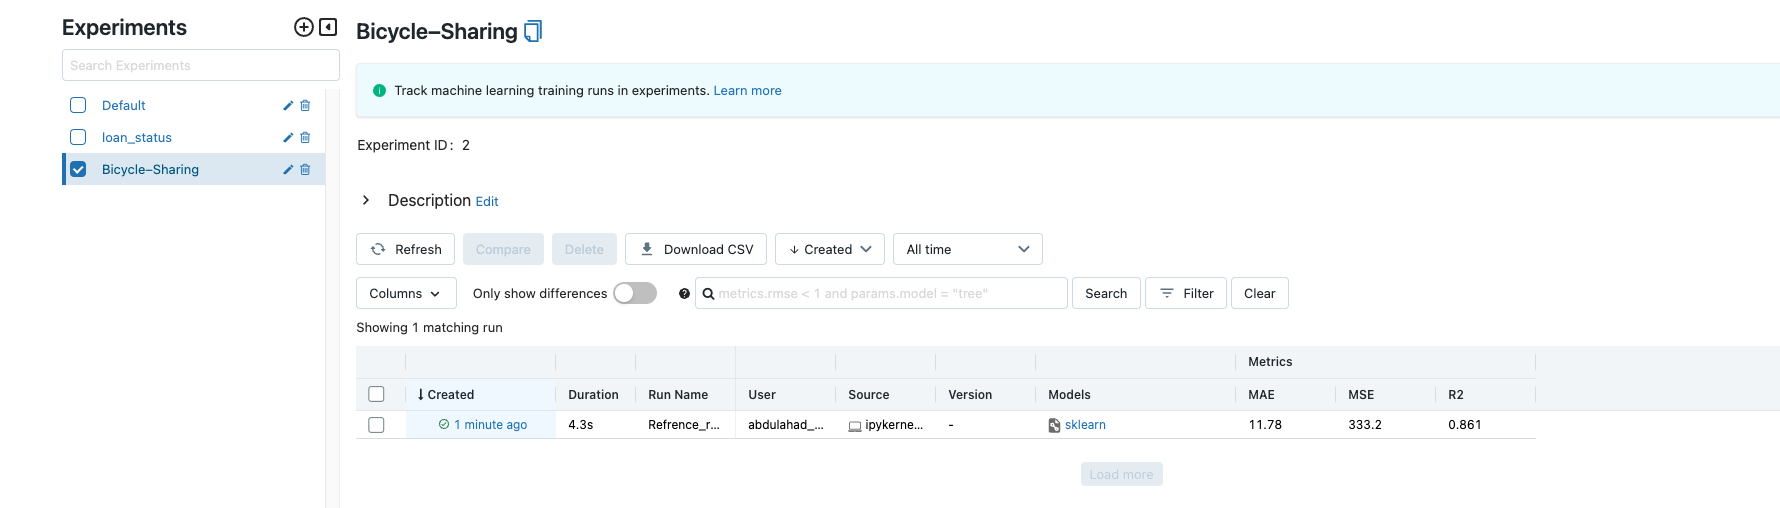

### **Week by week metric record**

we will record metrics weekly and add it to ml flow. for that from the currecnt data we will make experiment batches

In [46]:
experiment_batches = [
    ('2011-01-29 00:00:00','2011-02-07 23:00:00'),
    ('2011-02-07 00:00:00','2011-02-14 23:00:00'),
    ('2011-02-15 00:00:00','2011-02-21 23:00:00'),
]

In [47]:

#start new run
for date in experiment_batches:
    with mlflow.start_run() as run: #inside brackets run_name='test'

        mlflow.set_tag('mlflow.runName',"run_"+str(date[0])+" : "+str(date[1]))

        # Log parameters
        mlflow.log_param("begin", date[0])
        mlflow.log_param("end", date[1])

        # Get metrics
        current_data=current.loc[date[0]:date[1]]
        current_x=current_data[numerical_features + categorical_features]
        current_y=current_data[target]
        current_pred = regressor.predict(current_x)

        mae=mean_absolute_error(current_y,current_pred)
        mse=mean_squared_error(current_y,current_pred)
        r2 = r2_score(current_y,current_pred)


        # Log metrics
        mlflow.log_metric('MAE', round(mae, 3))
        mlflow.log_metric('MSE', round(mse, 3))
        mlflow.log_metric('R2', round(r2, 3))

        print(run.info)

<RunInfo: artifact_uri='file:///content/mlruns/121107545285937136/43673b825e6a41928e9d0a16f0c8f163/artifacts', end_time=None, experiment_id='121107545285937136', lifecycle_stage='active', run_id='43673b825e6a41928e9d0a16f0c8f163', run_name='handsome-hawk-859', start_time=1762511573645, status='RUNNING', user_id='root'>
<RunInfo: artifact_uri='file:///content/mlruns/121107545285937136/a6bf233db98147389a1d9b1c11d7d966/artifacts', end_time=None, experiment_id='121107545285937136', lifecycle_stage='active', run_id='a6bf233db98147389a1d9b1c11d7d966', run_name='defiant-robin-492', start_time=1762511573842, status='RUNNING', user_id='root'>
<RunInfo: artifact_uri='file:///content/mlruns/121107545285937136/f51fbbd2a38f45e7846e81e58e4d0251/artifacts', end_time=None, experiment_id='121107545285937136', lifecycle_stage='active', run_id='f51fbbd2a38f45e7846e81e58e4d0251', run_name='stately-croc-844', start_time=1762511573972, status='RUNNING', user_id='root'>


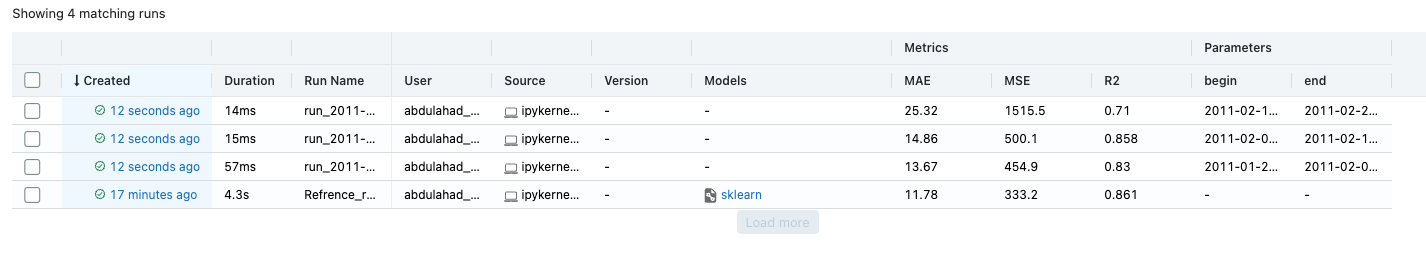